<a href="https://colab.research.google.com/github/Duongbui001/Twitter-analysis/blob/main/Twitter-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install wordcloud
!pip install emot
!pip install TextBlob
!pip install contractions
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 6.2 MB/s eta 0:00:00


In [7]:
import chart_studio
import re
import string
import emot
import collections
import ipywidgets
import contractions
import cufflinks
import nltk.tokenize
!pip install emoji

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

from textblob import TextBlob
from google.colab import widgets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=29767f5643272da70522144eaec7c0599bad2a1fe34df5d57205bf83c5a2d15c
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [8]:
username='duong3ku'
api_key='FMh9trGsYnBkkNLlDIOV'

chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

pd.set_option('display.max_colwidth', None)

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

sid = SentimentIntensityAnalyzer()
emot_obj = emot.core.emot()

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

pio.renderers.default = 'colab'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [10]:
from google.colab import files
 
 
uploaded = files.upload()

Saving trump-tweets.csv to trump-tweets.csv


In [11]:
import pandas as pd
 
df = pd.read_csv("trump-tweets.csv")
df.sample(n=20)

,user_name,text,hashtags
28951,jake wade,This supposed gag order by the #NYjudge is a horrible concept. This unprecedented (and obviously political trial) should have 100% transparency. The #TrumpIndictment and following trial is a banana republic clown show.,['NYjudge']
41695,INFORMATION,🔥 Indictment against trump: exploring the next steps: trump going to prison!\n\nread More 👉 https://t.co/ep5uUAIyf1\nread More 👉 https://t.co/ep5uUAIyf1\n\n#Trumpindictment #Trump #Donaldtrump,NaN
28995,Mimi ☯️☮️,"@JennaEllisEsq The judge makes the call, not the democrats and you know it. But, tbh I hope to hear from #TheDefendant UNDER OATH! \n#RuleofLaw #TrumpIndicted #TrumpIndictment",NaN
29779,PTV Sports Live Tv,Lucknow Super Giants opt to bowl\nLive Cricket Streaming https://t.co/L0OxprWHHx… #IPL2023 #IPL #IPLonStar #ChennaiSuperKings #PakistanCricket #IndoreAccident #KisiKaBhaiKisiKiJaan #StormyDaniels #IPL2023OpeningCeremony #AnushkaSharma,"['IPL2023', 'IPL', 'IPLonStar']"
50646,Sammiembuk,"You can't spend time in mediocrity and expect to sit at the table of excellence and relevance. No matter how small, take those baby steps and develop yourself.\nWard Prowse Gabriel Leeds Tinubu and 52 Congratulations 001 Kiwior Arrested #TrumpIndictment #TrumpIndicted",NaN
23353,Starts With Us,@SethAbramson A lot is happening in the country right now…\n\nWe’re challenging ourselves to pause and listen instead of reacting. To be self-aware and to think critically. To ask questions before providing answers.\n\n#TrumpArraignment https://t.co/OdYAzSA5Dr,NaN
19219,mechtild jd,@ProjectLincoln Update needed:\nINDICATED\n#TrumpArraignment \n#TrumpIndicment https://t.co/tKHwnjO4Fu,"['TrumpArraignment', 'TrumpIndicment']"
8556,True Crimes Cafe,Her Pregnancy disappeared after being kidnapped for 5 days. The True Cri... https://t.co/tY1EFRm263 via @YouTube \n\n#Trump #PregnantWife #pregnancy #TrumpIndicment #TrumpForPrison2024 #PregnantWoman #SuperMarioBrosMovie #SUGA #AgustD https://t.co/wB1rRCvQI7,NaN
37324,"gregor (ride bikes, tax billionaires) fallis",I committed poetry (of a sort).\n#TrumpArrest\n\ntrumpoetry https://t.co/DVxhyXAUhf,['TrumpArrest']
530,Oscar Lester Solitare - The Sicilian-American,https://t.co/WUIrvWN7cc\n\nMust See analyst! #bragg #TrumpIndictment #TrumpRally #BraggForPrison,"['bragg', 'TrumpIndictment', 'TrumpRally', 'BraggForPrison']"


In [15]:
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

In [13]:
df['text'] = df['text'].astype('string') 
print(df['text'])


0                                                                                                                                                                                                             @KarenRu92082899 @JayneWallis6 @thejackhopkins @JoeBiden Jog on Eva #TrumpIndictment #MAGAMorons https://t.co/yV8OzgGeDC
1                                                                                                                                                                     Russian soldiers did not make it alive after Azov fighters successfully defeated them.
#Russia #Ukraine #America #China #TrumpIndictment https://t.co/DvizIsPWdv
2                                                                                   @LStargazer54 @EdKrassen Always #MAGA crazies projecting everything Fat Caligula has done onto someone, anyone else so they feel better about their insignificant, hate-filled racist lives. Never fails.
#TrumpIndictment https://t.co/KHYuvhk3if
3                  

In [16]:
df['processed_text'] = df['text'].apply(pre_process)

In [17]:
df.sample(n=5)

,user_name,text,hashtags,processed_text
9967,latina4FJB,@SUBRATA30016572 @PaulaJo4GOP LATINAS FOR TRUMP FOREVER. #Trump2024NowMorethanEver https://t.co/rvj4TMTtx4,['Trump2024NowMorethanEver'],latinas for trump forever.
33086,Jarica Davis 🏳️‍🌈 #Betocrat #HumanRights4All,"#TrumpArrest #TrumpPerpWalk “The tranquilizing drug of gradualism” is a poison on democracy. There must be equal justice, for all. #NoOneIsAboveTheLaw https://t.co/gr59NlaYGu","['TrumpArrest', 'TrumpPerpWalk']","“the tranquilizing drug of gradualism” is a poison on democracy. there must be equal justice, for all."
26370,vioulpw44,@joncoopertweets #TrumpIndictment The time of impunity is over.🤔 https://t.co/LOTyP97VNU,['TrumpIndictment'],the time of impunity is over.🤔
336,𝕯.𝕵. 𝕾𝖊𝖒𝖎 𝕽𝖊𝖙𝖎𝖗𝖊𝖉 🚛 🥁,@keriRN @YouTube Let him keep flappin his trap ... I warned him a week ago he didn't have the power to interfere with a state prosecution.. I hope the #ManhattanDA indicts Gym Jordon for his ongoing vendetta against him for the #TrumpIndictment matter. https://t.co/9wmdMOmmvL,NaN,let him keep flappin his trap ... i warned him a week ago he didn't have the power to interfere with a state prosecution.. i hope the indicts gym jordon for his ongoing vendetta against him for the matter.
25145,The Independent,- #TrumpIndictment - Watch: Marjorie Taylor Greene compares Trump to Nelson Mandela and Jesus https://t.co/fjmW5qqSWA,['TrumpIndictment'],- - watch: marjorie taylor greene compares trump to nelson mandela and jesus


In [25]:
def get_top_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_bigram(df['processed_text'], 30)



In [26]:
df1 = pd.DataFrame(common_words, columns = ['TweetText' , 'count'])
df1.groupby('TweetText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',
    yTitle='Count',
    linecolor='black',
    title='Top 30 bigrams in Tweets')

In [42]:
wordnet_lem = WordNetLemmatizer()

# Lemmatize processed text and join everything in a list
df['text_lem'] = df['processed_text'].apply(wordnet_lem.lemmatize)
all_words_lem = ' '.join([word for word in df['text_lem']])

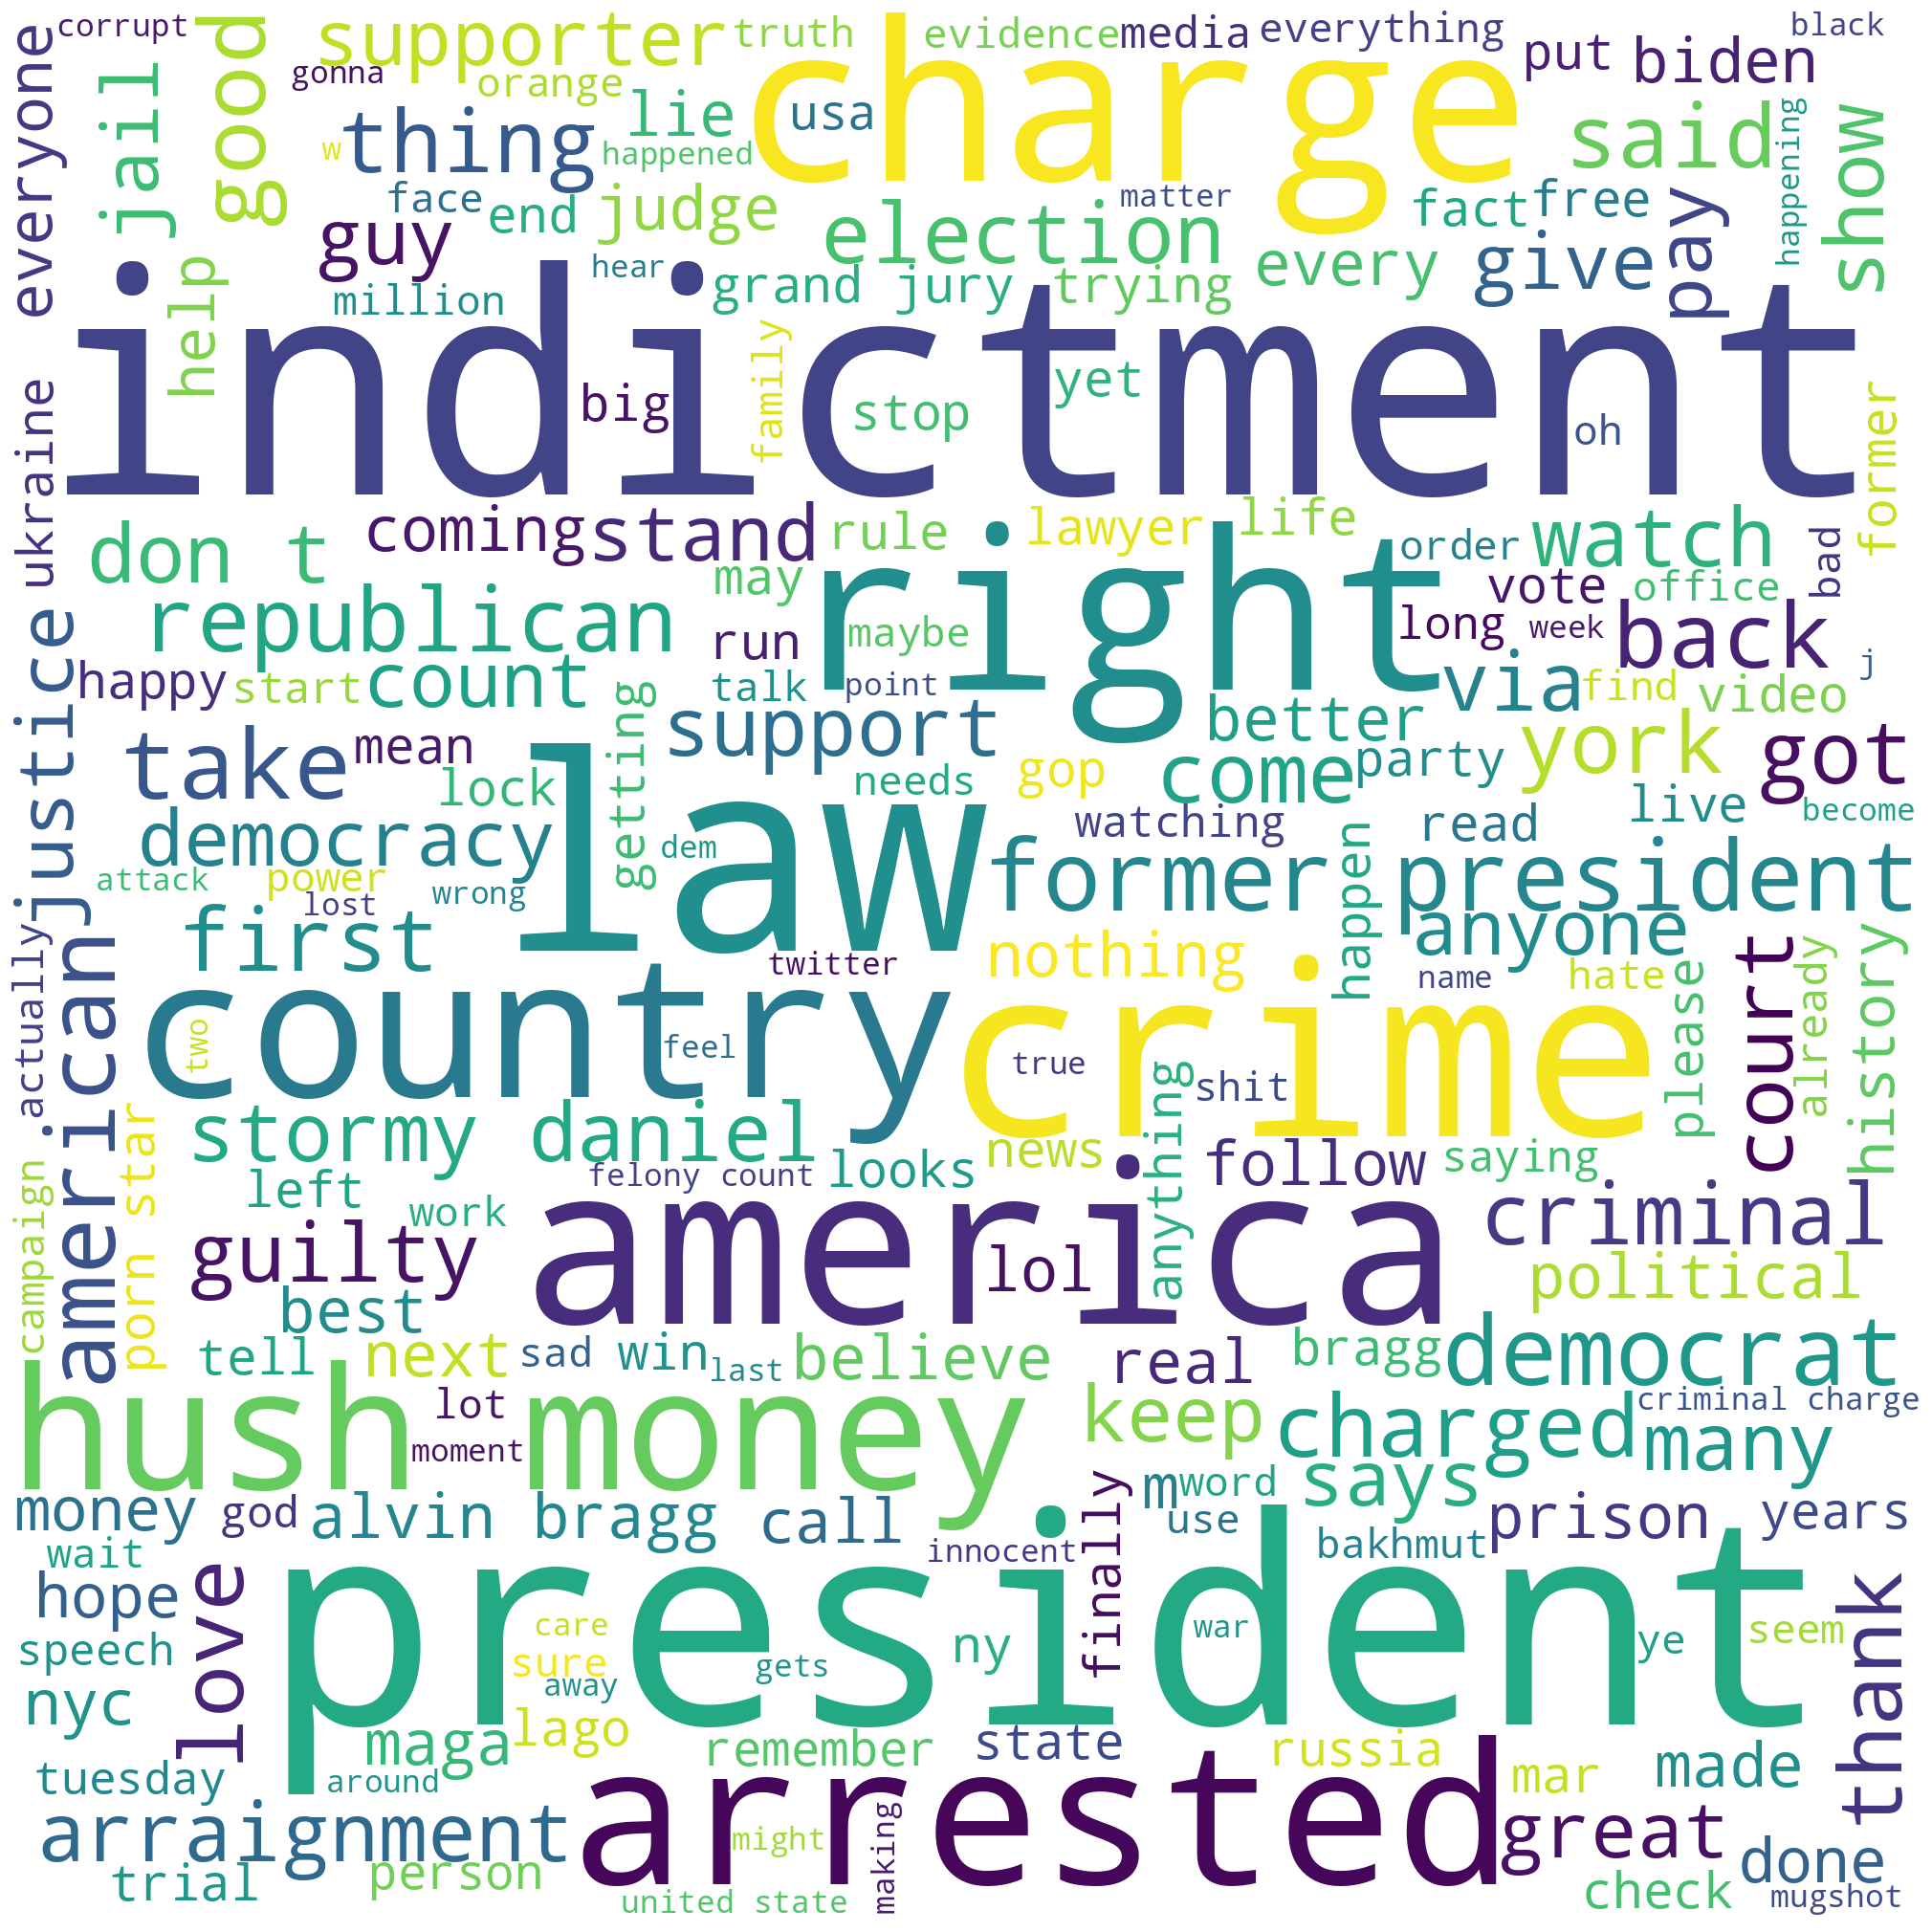

In [53]:
stopwords = set(STOPWORDS)
stopwords.update(["thought","case","make","see","trump","go","us","man","always","way","world","indicted","arrest","people","new","want","let","something","never","say","look","think","donald","another","must","hey","know","will","S","re","u","alway","one","don't","think","going","need","much","year","today","well","someone","really","now","still","day","time","even"])

wordcloud_twitter = WordCloud(height=2000,
                              width=2000,
                              background_color="white",
                              mode="RGBA",
                              stopwords=stopwords
                              ).generate(all_words_lem)

plt.figure(figsize=[20,20])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter, interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo.png", format="png")

plt.show()

In [44]:
# Retrieves all occurrences of @+text
df['mentions'] = df['text'].str.findall(r'@\w+')
# Removes the @ in front
df['mentions'] = [list(map(lambda x: x[1:], mentions)) for mentions in df['mentions']]
# Converts the list of words in each row to a string
df['mentions_string'] = df['mentions'].apply(lambda x: ' '.join(x))
# Concatenates all strings in one string
all_mentions = ' '.join([word for word in df['mentions_string']])

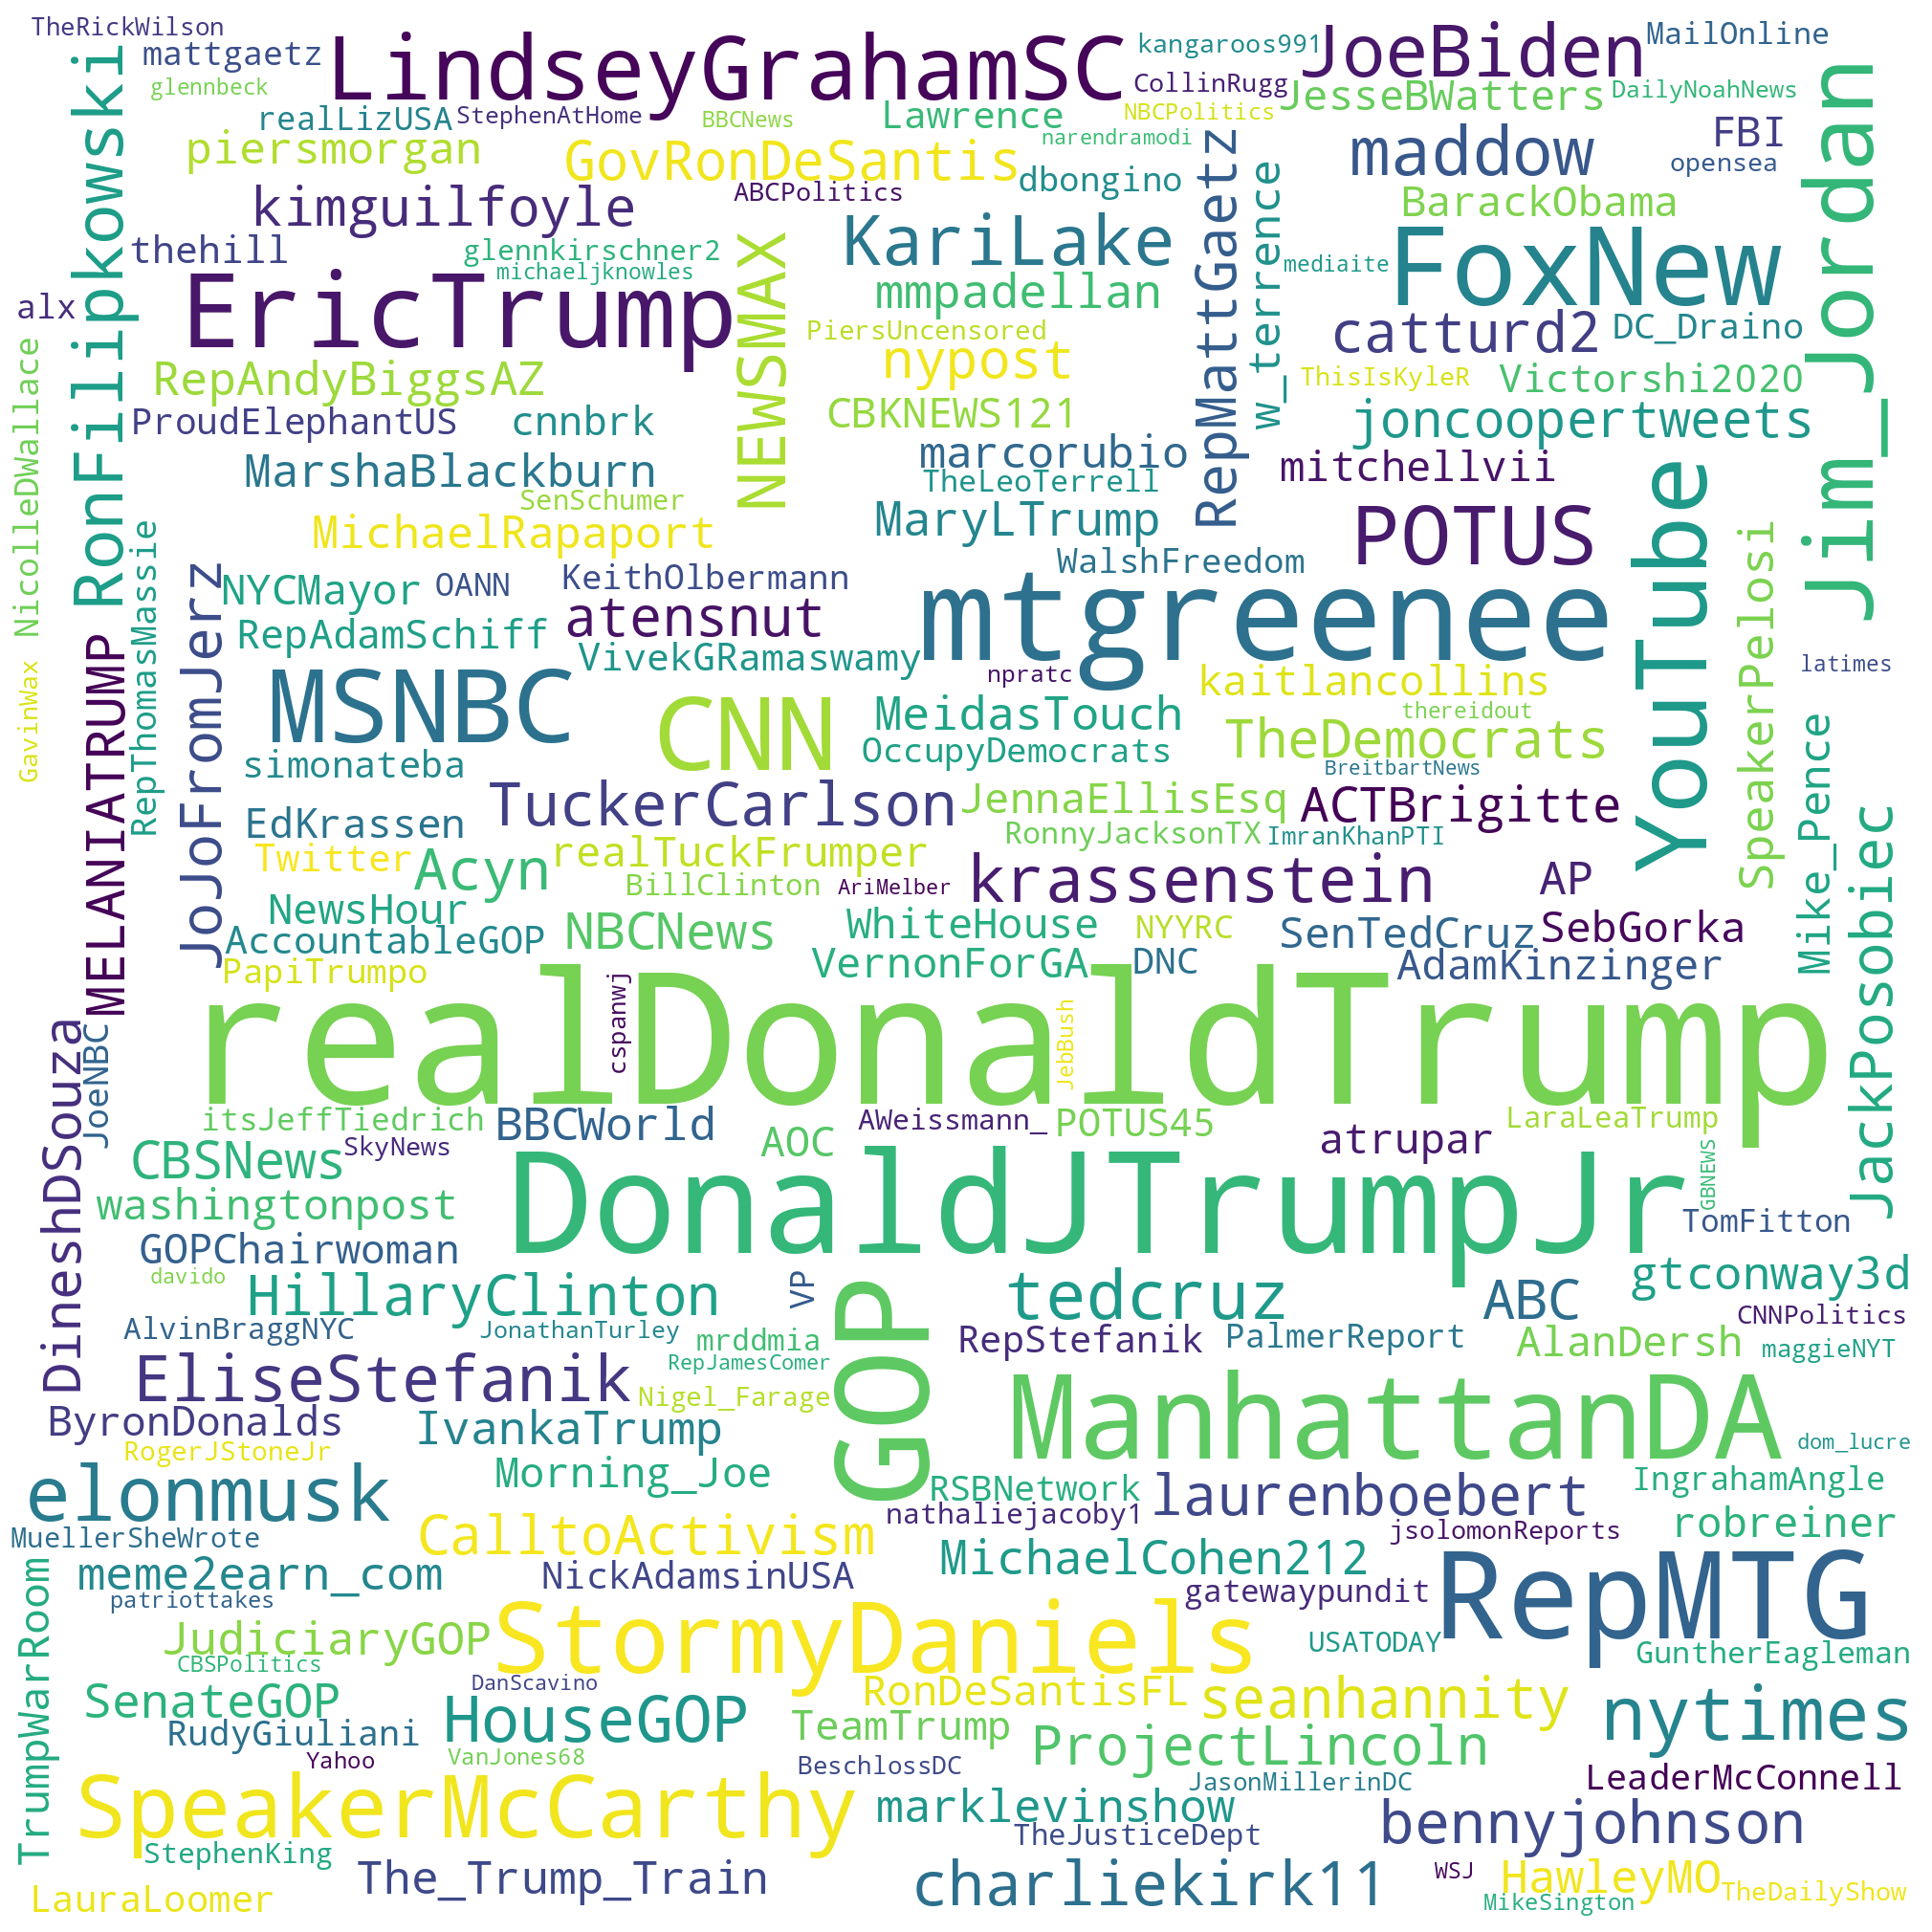

In [45]:
# Generate a word cloud image
wordcloud_twitter2 = WordCloud(height=2000,
                              width=2000,
                              background_color="white",
                              mode="RGBA",
                              stopwords=stopwords,
                              collocations = False,
                              ).generate(all_mentions)

# Create coloring from the image
plt.figure(figsize=[20,20])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter2, interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo_mentions.png", format="png")

plt.show()

In [46]:
# Define a function to extract emoticons
def extract_emoticons(text):
  res = emot_obj.emoji(text)
  return res['value']
     

In [47]:
df['emoticons'] = df['text'].apply(extract_emoticons)



In [ ]:

df.sample(n=10)

,user_name,text,hashtags,processed_text,text_lem,mentions,mentions_string,emoticons
46998,Agolf Twitler Slayer,My favorite meme of the day! Retweet or show me yours! #TrumpIndictment https://t.co/jL6W9Q9BRb,['TrumpIndictment'],my favorite meme of the day! retweet or show me yours!,my favorite meme of the day! retweet or show me yours!,[],,[]
23435,WordsOfWisdom,"We do not quit playing because we grow old, we grow old because we quit playing. - Oliver Wendell Holmes Jr. #TrumpArraignment #LaFirmaNetflix #earthquake #CHELIV #DRWFirstGoal https://t.co/RXvmeRrspk",NaN,"we do not quit playing because we grow old, we grow old because we quit playing. - oliver wendell holmes jr.","we do not quit playing because we grow old, we grow old because we quit playing. - oliver wendell holmes jr.",[],,[]
28475,Howard H. Lee,Crowing out #OPECProductionCuts by $WWE @CNBC #TrumpIndictment @BloombergRadio https://t.co/2wuKbA67Tc,"['OPECProductionCuts', 'TrumpIndictment']",crowing out by $wwe,crowing out by $wwe,"[CNBC, BloombergRadio]",CNBC BloombergRadio,[]
4538,⍟♡Ɠя3тє♡⍟,We all agree 👍 #Trump #TrumpIndictment #TrumpIsACriminal #TrumpForPrison #GretiansTag #indictment #TrumpIndicted #LockHimUp https://t.co/EX5HabsX35,"['Trump', 'TrumpIndictment', 'TrumpIsACriminal', 'TrumpForPrison', 'GretiansTag', 'indictment', 'TrumpIndicted']",we all agree 👍,we all agree 👍,[],,[👍]
39700,Trump Indictment,Has Rudy said anything about the Trump Indictment? I'm one of his best friends. #RudyGiulianiBlockedMe #TrumpIndictment https://t.co/XfbHTXMUfx,['RudyGiulianiBlockedMe'],has rudy said anything about the trump indictment? i'm one of his best friends.,has rudy said anything about the trump indictment? i'm one of his best friends.,[],,[]
14439,Winning Fam. Green tickets only,*THERE ARE MANY MEMBERS OF THIS PLATFORM WHO HAS REFUSED TO TESTIFY AFTER WINNING* *MEMBERS WHO DO NOT APPRECIATE THE GUARANTEED GEMES THEY ARE BENEFITING FROM THE PLATFORM I KNOW THEM ALL #DOGE #TrumpArrest #TrumpArraignment https://t.co/UhK7NxBHSx,NaN,*there are many members of this platform who has refused to testify after winning* *members who do not appreciate the guaranteed gemes they are benefiting from the platform i know them all,*there are many members of this platform who has refused to testify after winning* *members who do not appreciate the guaranteed gemes they are benefiting from the platform i know them all,[],,[]
14529,Graeme,"The @BorisJohnson loyalists rallying around @realDonaldTrump...a couple of lying, cheating, corrupt, odious ponces unfit to hold any public office..they both belong in jail #TrumpArrest https://t.co/FiyVtKuiks",NaN,"the loyalists rallying around ...a couple of lying, cheating, corrupt, odious ponces unfit to hold any public office..they both belong in jail","the loyalists rallying around ...a couple of lying, cheating, corrupt, odious ponces unfit to hold any public office..they both belong in jail","[BorisJohnson, realDonaldTrump]",BorisJohnson realDonaldTrump,[]
32982,Shelby Varney 𝝅,The pieces move across the board. #TrumpIndicment #TrumpArrest #Maga #TRUMP2024 https://t.co/idJrxH7Rtx,"['TrumpIndicment', 'TrumpArrest', 'Maga', 'TRUMP2024']",the pieces move across the board.,the pieces move across the board.,[],,[]
34718,Sci-Dem🇪🇺🇺🇦😷💉🌍🌱,That FACE 🤣😂😂😂😂 #TrumpArrest #TrumpIndicment #Trump https://t.co/VRpLq2KCJe,"['TrumpArrest', 'TrumpIndicment', 'Trump']",that face 🤣😂😂😂😂,that face 🤣😂😂😂😂,[],,"[🤣, 😂, 😂, 😂, 😂]"
43036,Tiv,Crucify the man who revealed their sin and release the criminal. Has anything changed since Biblical times? Matt 27:15-22 #TrumpArrest,['TrumpArrest'],crucify the man who revealed their sin and release the criminal. has anything changed since biblical times? matt 27:15-22,crucify the man who revealed their sin and release the criminal. has anything changed since biblical times? matt 27:15-22,[],,[]


In [ ]:
df['emoticons'].apply(lambda x: collections.Counter(x))
combined_counts = sum(df['emoticons'].apply(lambda x: collections.Counter(x)), collections.Counter())
emoji_dict = dict(combined_counts)
sorted_emoji_dict = dict(sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True))
     

In [ ]:
d = {k: v for i, (k, v) in enumerate(sorted_emoji_dict.items()) if i < 30}
df_emojis = pd.DataFrame(list(d.items()), columns=['Emojis', 'Count'])
df_emojis.at[5, 'Emojis'] = '❤️'
df_emojis.at[6, 'Emojis'] = '🤡'

In [ ]:
df_emojis.groupby('Emojis').sum()['Count'].sort_values(ascending=False).iplot(
    kind='bar',xTitle='Emojis', yTitle='Count', linecolor='black', title='The 30 most used emojis')
     


In [48]:
df['vader_polarity'] = df['processed_text'].map(lambda text: sid.polarity_scores(text)['compound'])
df['blob_polarity'] = df['processed_text'].map(lambda text: TextBlob(text).sentiment.polarity)

In [49]:
new_df = df[['vader_polarity', 'blob_polarity']]
new_df = new_df.rename(columns={'vader_polarity': 'Vader', 'blob_polarity': 'TextBlob'})

In [ ]:
new_df.iplot(
    kind='hist',
    bins=40,
    xTitle='← Negative — — — — — — Positive →',
    linecolor='black',
    yTitle='Count',
    title='Comparison of the distributions of sentimental polarities',
    colors = ['#1DA1F2', '#EB8C17'],
    barmode="group")
     


In [ ]:
new_df.describe()

,Vader,TextBlob
count,52714.000000,52714.000000
mean,-0.035804,0.064170
std,0.483057,0.291451
min,-0.993200,-1.000000
25%,-0.440400,0.000000
50%,0.000000,0.000000
75%,0.361200,0.178571
max,0.986900,1.000000


In [19]:
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

df['Polarity'] = df['processed_text'].apply(get_polarity)


In [18]:
df['Polarity'] = df['processed_text'].apply(get_polarity)
df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

<Axes: title={'center': 'Sentiment Analysis - TextBlob'}, xlabel='Polarity', ylabel='counts'>

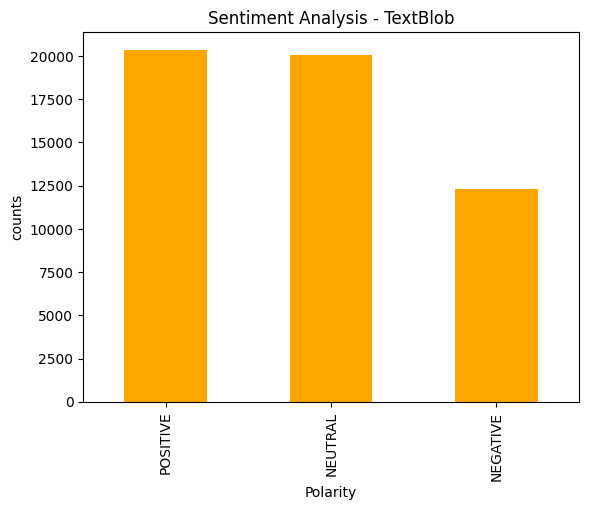

In [31]:
df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis - TextBlob",xlabel="Polarity",ylabel="counts",color="orange")

In [37]:
df['scores'] = df['processed_text'].apply(lambda Description: sid.polarity_scores(Description))
df.head()

,user_name,text,hashtags,processed_text,Polarity,Sentiment_Type,scores,compound,sentiment_type,stop_text
0,StevieM,@KarenRu92082899 @JayneWallis6 @thejackhopkins @JoeBiden Jog on Eva #TrumpIndictment #MAGAMorons https://t.co/yV8OzgGeDC,"['TrumpIndictment', 'MAGAMorons']",jog on eva,0.000000,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,NEUTRAL,jog eva
1,news,Russian soldiers did not make it alive after Azov fighters successfully defeated them. #Russia #Ukraine #America #China #TrumpIndictment https://t.co/DvizIsPWdv,"['Russia', 'Ukraine', 'America']",russian soldiers did not make it alive after azov fighters successfully defeated them.,0.283333,POSITIVE,"{'neg': 0.347, 'neu': 0.482, 'pos': 0.171, 'compound': -0.3147}",-0.3147,NEGATIVE,russian soldiers make alive azov fighters successfully defeated
2,D̴i̴a̴n̴a̴ ̴-T̴w̴i̴t̴t̴e̴r̴ ̴I̴n̴v̴i̴s̴i̴b̴l̴e̴ 🐦,"@LStargazer54 @EdKrassen Always #MAGA crazies projecting everything Fat Caligula has done onto someone, anyone else so they feel better about their insignificant, hate-filled racist lives. Never fails. #TrumpIndictment https://t.co/KHYuvhk3if",['MAGA'],"always crazies projecting everything fat caligula has done onto someone, anyone else so they feel better about their insignificant, hate-filled racist lives. never fails.",0.375000,POSITIVE,"{'neg': 0.201, 'neu': 0.627, 'pos': 0.172, 'compound': -0.2274}",-0.2274,NEGATIVE,always crazies projecting everything fat caligula done onto someone anyone else feel better insignificant hatefilled racist lives never fails
3,ukraine news,This is how “Azov” fighters entered Luhansk’s town that had Russian soldiers – movie-like operation #Russia #Ukraine #America #China #TrumpIndictment https://t.co/HmLSacCjN8,['Russia'],this is how “azov” fighters entered luhansk’s town that had russian soldiers – movie-like operation,0.000000,NEUTRAL,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.0516}",-0.0516,NEGATIVE,“azov” fighters entered luhansk’s town russian soldiers – movielike operation
4,ukraine news,"In Mariupol, Azov fighters help civilians with food. #Russia #Ukraine #America #China #TrumpIndictment https://t.co/2zhBufhqyC","['Russia', 'Ukraine', 'America', 'China', 'TrumpIndictment']","in mariupol, azov fighters help civilians with food.",0.000000,NEUTRAL,"{'neg': 0.121, 'neu': 0.606, 'pos': 0.273, 'compound': 0.3612}",0.3612,POSITIVE,mariupol azov fighters help civilians food


In [38]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

<Axes: title={'center': 'Sentiment analysis - Vader'}, xlabel='Polarity', ylabel='counts'>

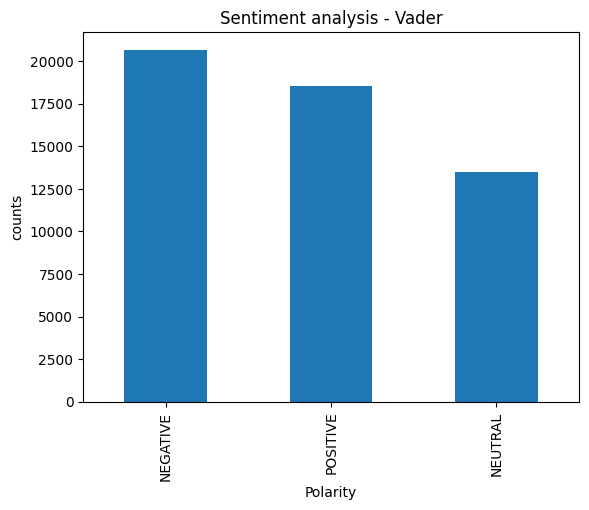

In [32]:
df.sentiment_type.value_counts().plot(kind='bar',title="Sentiment analysis - Vader",xlabel="Polarity",ylabel="counts")

In [39]:
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df['stop_text'] = df['processed_text'].apply(lambda x: remove_stop_words(x))

In [50]:
topics = ['donald trump',
          'hush money',
          'stormy daniels',
          '34 felony', 
          'trump indictment']

vader_sentiments = df['vader_polarity'].tolist()
textblob_sentiments = df['blob_polarity'].tolist()
text = df['stop_text'].tolist()

# We create a new column Topic
df['Topic'] = ""
for topic in topics:
    df.loc[df['stop_text'].str.contains(topic), 'Topic'] = topic

# We create a new DataFrame with columns topic / sentiment / source
data = []
for topic in topics:
    topic_rows = df[df['Topic'] == topic]
    # Average sentiment per topic
    vader_sentiments = topic_rows['vader_polarity'].sum() / topic_rows.shape[0]
    textblob_sentiments = topic_rows['blob_polarity'].sum() / topic_rows.shape[0]
    # Append data
    data.append({'Topic': topic, 'Sentiment': vader_sentiments, 'Source': 'Vader'})
    data.append({'Topic': topic, 'Sentiment': textblob_sentiments, 'Source': 'TextBlob'})

df_new = pd.DataFrame(data)

# Plot the sentiment for each topic
fig = px.bar(df_new,
             x='Topic',
             y='Sentiment',
             labels={"Topic": "Topic",
                     "Sentiment": "← Negative — — — — — — — — — — — Positive →",
                 },
             color='Source',
             barmode='group',
             color_discrete_sequence = ['#1DA1F2', '#EB8C17'],
             title='Comparative sentimental analysis by topics',
             template='plotly_white')

fig.update_traces(marker_line_width=1,
                  marker_line_color="black")

fig.show()

In [ ]:
usernames = ['@ManhattanDA', '@RepMTG', '@realDonaldTrump' , '@SpeakerMcCarthy', '@GOP','@CNN','@StormyDaniels','@FoxNew','@mtgreenee']
vader_sentiments = df['vader_polarity'].tolist()
textblob_sentiments = df['blob_polarity'].tolist()
text = df['text'].tolist()

# create a new column for the username
df['Mention'] = ""
for username in usernames:
    df.loc[df['text'].str.contains(username), 'Mention'] = username

# create a new dataframe with columns for username, sentiment, and sentiment source
data = []
for username in usernames:
    username_rows = df[df['Mention'] == username]
    vader_sentiments = username_rows['vader_polarity'].sum() / username_rows.shape[0]
    textblob_sentiments = username_rows['blob_polarity'].sum() / username_rows.shape[0]
    data.append({'Mention': username, 'Sentiment': vader_sentiments, 'Source': 'Vader'})
    data.append({'Mention': username, 'Sentiment': textblob_sentiments, 'Source': 'TextBlob'})
df_new = pd.DataFrame(data)

# plot the sentiment for each username using Plotly
fig = px.bar(df_new,
             x='Mention',
             y='Sentiment',
             labels={"Mention": "Mention",
                     "Sentiment": "← Negative — — — — — — — — — — — Positive →"},
             color='Source',
             barmode='group',
             color_discrete_sequence = ['#1DA1F2', '#EB8C17'],
             title='Comparative sentimental analysis by accounts',
             template='plotly_white')

fig.update_traces(marker_line_width=1,
                  marker_line_color="black")

fig.show()
     